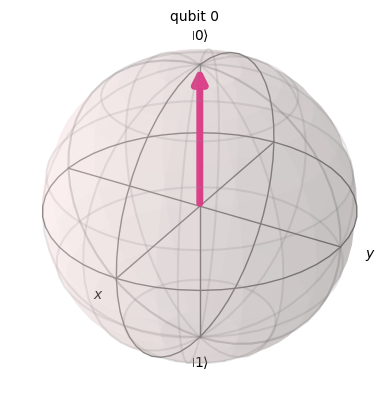

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# 양자회로 생성 및 큐비트 초기화
qc = QuantumCircuit(1, 1)

# 큐비트 시각화
state = Statevector(qc)
plot_bloch_multivector(state)

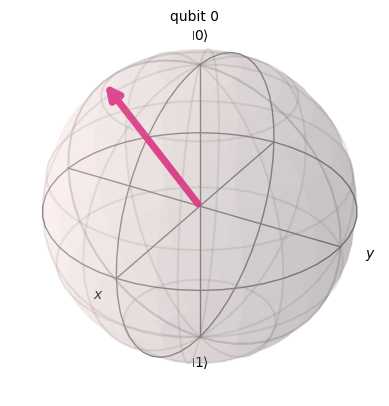

In [2]:
# 큐비트에 RX게이트 적용 (= pi/4만큼 X축 회전)
qc.rx(3.14/4, 0)

# 큐비트 시각화
state2 = Statevector(qc)
plot_bloch_multivector(state2)

{'0': np.int64(850161), '1': np.int64(149839)}


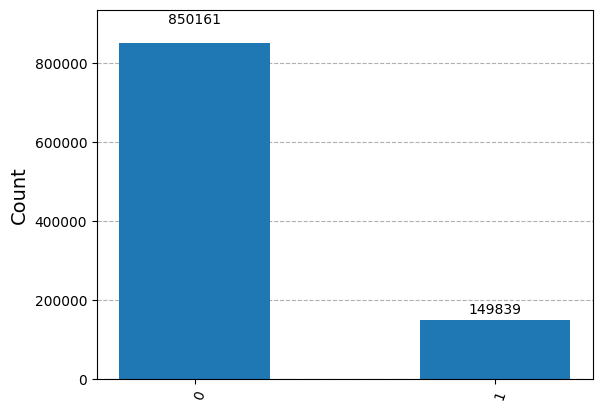

In [3]:
import os
from qiskit_ionq import IonQProvider

# IONQ 시뮬레이터 초기화
api_key = os.getenv("IONQ_API_KEY")
provider = IonQProvider(api_key)
simulator = provider.get_backend("ionq_simulator")

# 측정
qc.measure(0, 0)

# 1,000,000번 실행
job = simulator.run(qc, shots=1000000)

# 결과출력
# 예상결과: 75% 확률로 0, 25% 확률로 1.
# 실제결과: 85% 확률로 0, 15% 확률로 1.
# 이유: 양자역학에서 확률은 비선형 관계라서 회전각에 비례하지 않음.
# 즉, RX게이트 적용 시 확률은 cos^2(θ/2)
counts = job.get_counts()
print(counts)

from qiskit.visualization import plot_histogram

plot_histogram(counts)